In [6]:
import pandas as pd

df = pd.read_csv('mobile_usage_behavioral_analysis.csv')
df.head()

User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0        1   56    Male                   2.61                     7.15   
1        2   46    Male                   2.13                    13.79   
2        3   32  Female                   7.28                     4.50   
3        4   25  Female                   1.20                     6.29   
4        5   38    Male                   6.31                    12.59   

   Number_of_Apps_Used  Social_Media_Usage_Hours  \
0                   24                      4.43   
1                   18                      4.67   
2                   11                      4.58   
3                   21                      3.18   
4                   14                      3.15   

   Productivity_App_Usage_Hours  Gaming_App_Usage_Hours     Location  
0                          0.55                    2.40  Los Angeles  
1                          4.42                    2.43      Chicago  
2                          1.71                    2.83      Houston  
3                          3.42                    4.58      Phoenix  
4                          0.13                    4.00     New York

In [ ]:
#Analizę aksploracyjna (statystyki opisowe, korelacje):  
#kompletność, odchylenia standardowe, średnie, korelacje.  

In [17]:
onlyNums = df.drop(columns=["User_ID", "Gender", "Location"])

d = pd.DataFrame(columns=onlyNums.columns)
srednie = []
mediany = []
odchylenia = []
kompletnosc = []

for f in range(0, onlyNums.shape[1]):
    kolumna = onlyNums.iloc[:, f]
    srednie.append(kolumna.mean())
    mediany.append(kolumna.median())
    odchylenia.append(kolumna.std()) 
    
    procent_brakow = (kolumna.count() / len(kolumna)) * 100
    kompletnosc.append(f"{procent_brakow:.2f}%")


d.loc["średnia"] = srednie
d.loc["mediana"] = mediany
d.loc["odchylenie_std"] = odchylenia
d.loc["kompletność"] = kompletnosc

print("Statystyki Opisowe")
print(d)

print("\nMacierz Korelacji")
korelacje = onlyNums.corr()
print(korelacje)

Statystyki Opisowe
                      Age Total_App_Usage_Hours Daily_Screen_Time_Hours  \
średnia            38.745               6.40567                 7.69631   
mediana              40.0                 6.455                    7.88   
odchylenie_std  12.186734              3.134855                3.714187   
kompletność       100.00%               100.00%                 100.00%   

               Number_of_Apps_Used Social_Media_Usage_Hours  \
średnia                     16.647                  2.45633   
mediana                       17.0                    2.445   
odchylenie_std             7.61961                 1.439525   
kompletność                100.00%                  100.00%   

               Productivity_App_Usage_Hours Gaming_App_Usage_Hours  
średnia                             2.49527                2.47541  
mediana                               2.435                  2.455  
odchylenie_std                     1.443392               1.450362  
kompletność  

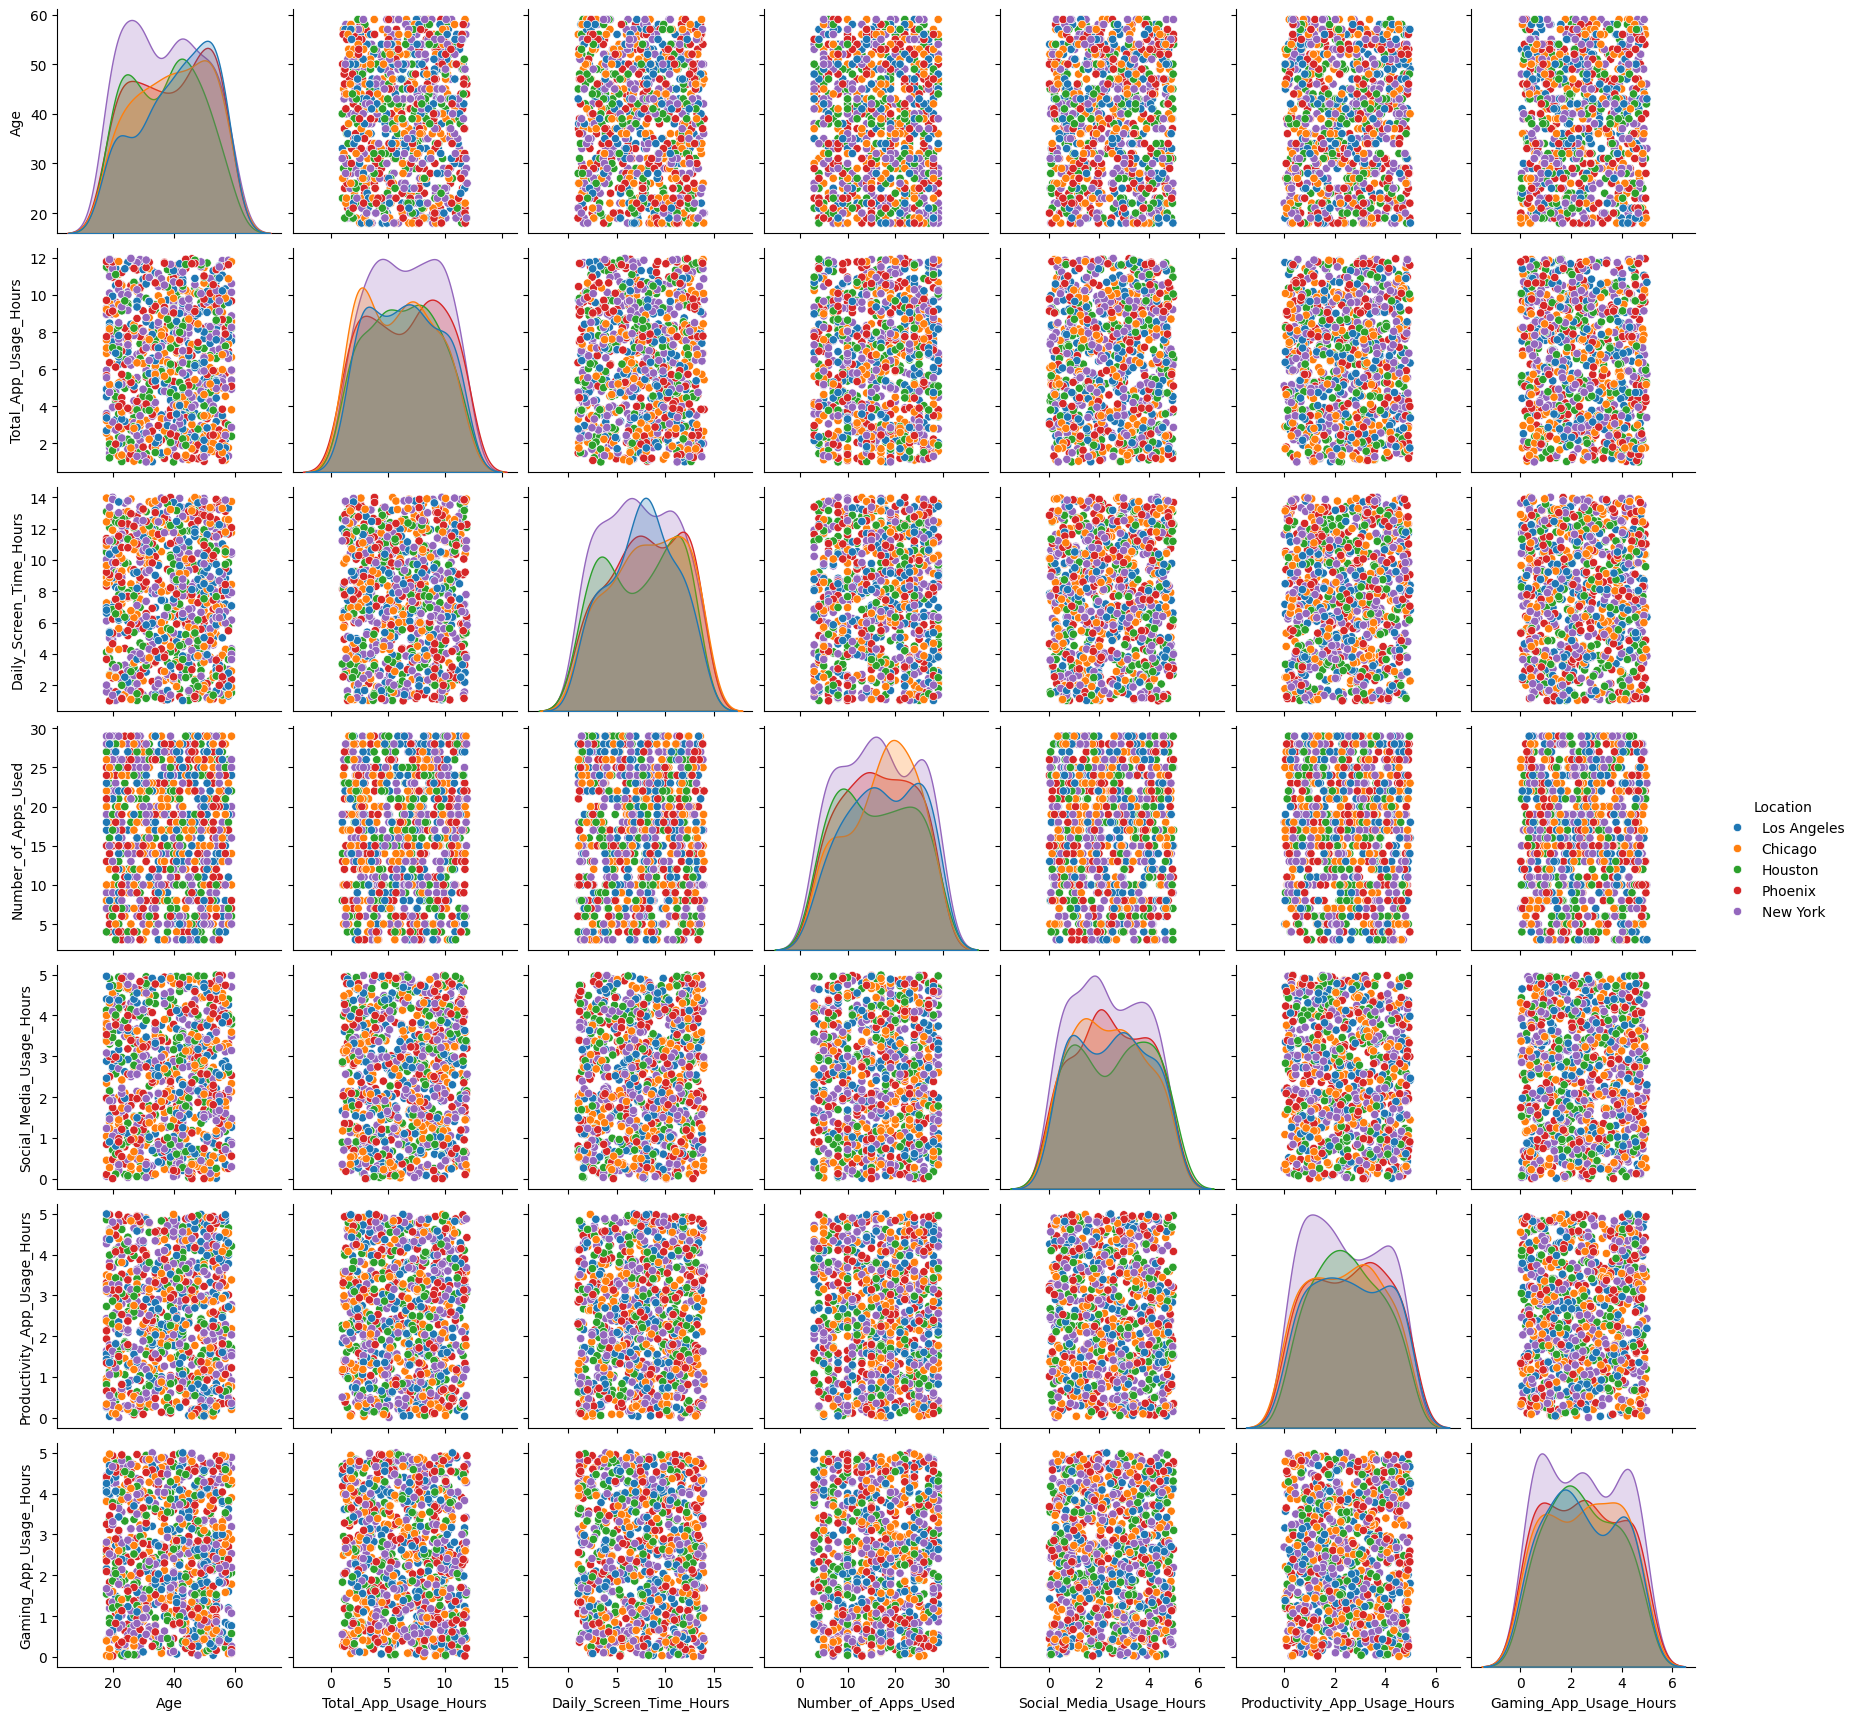

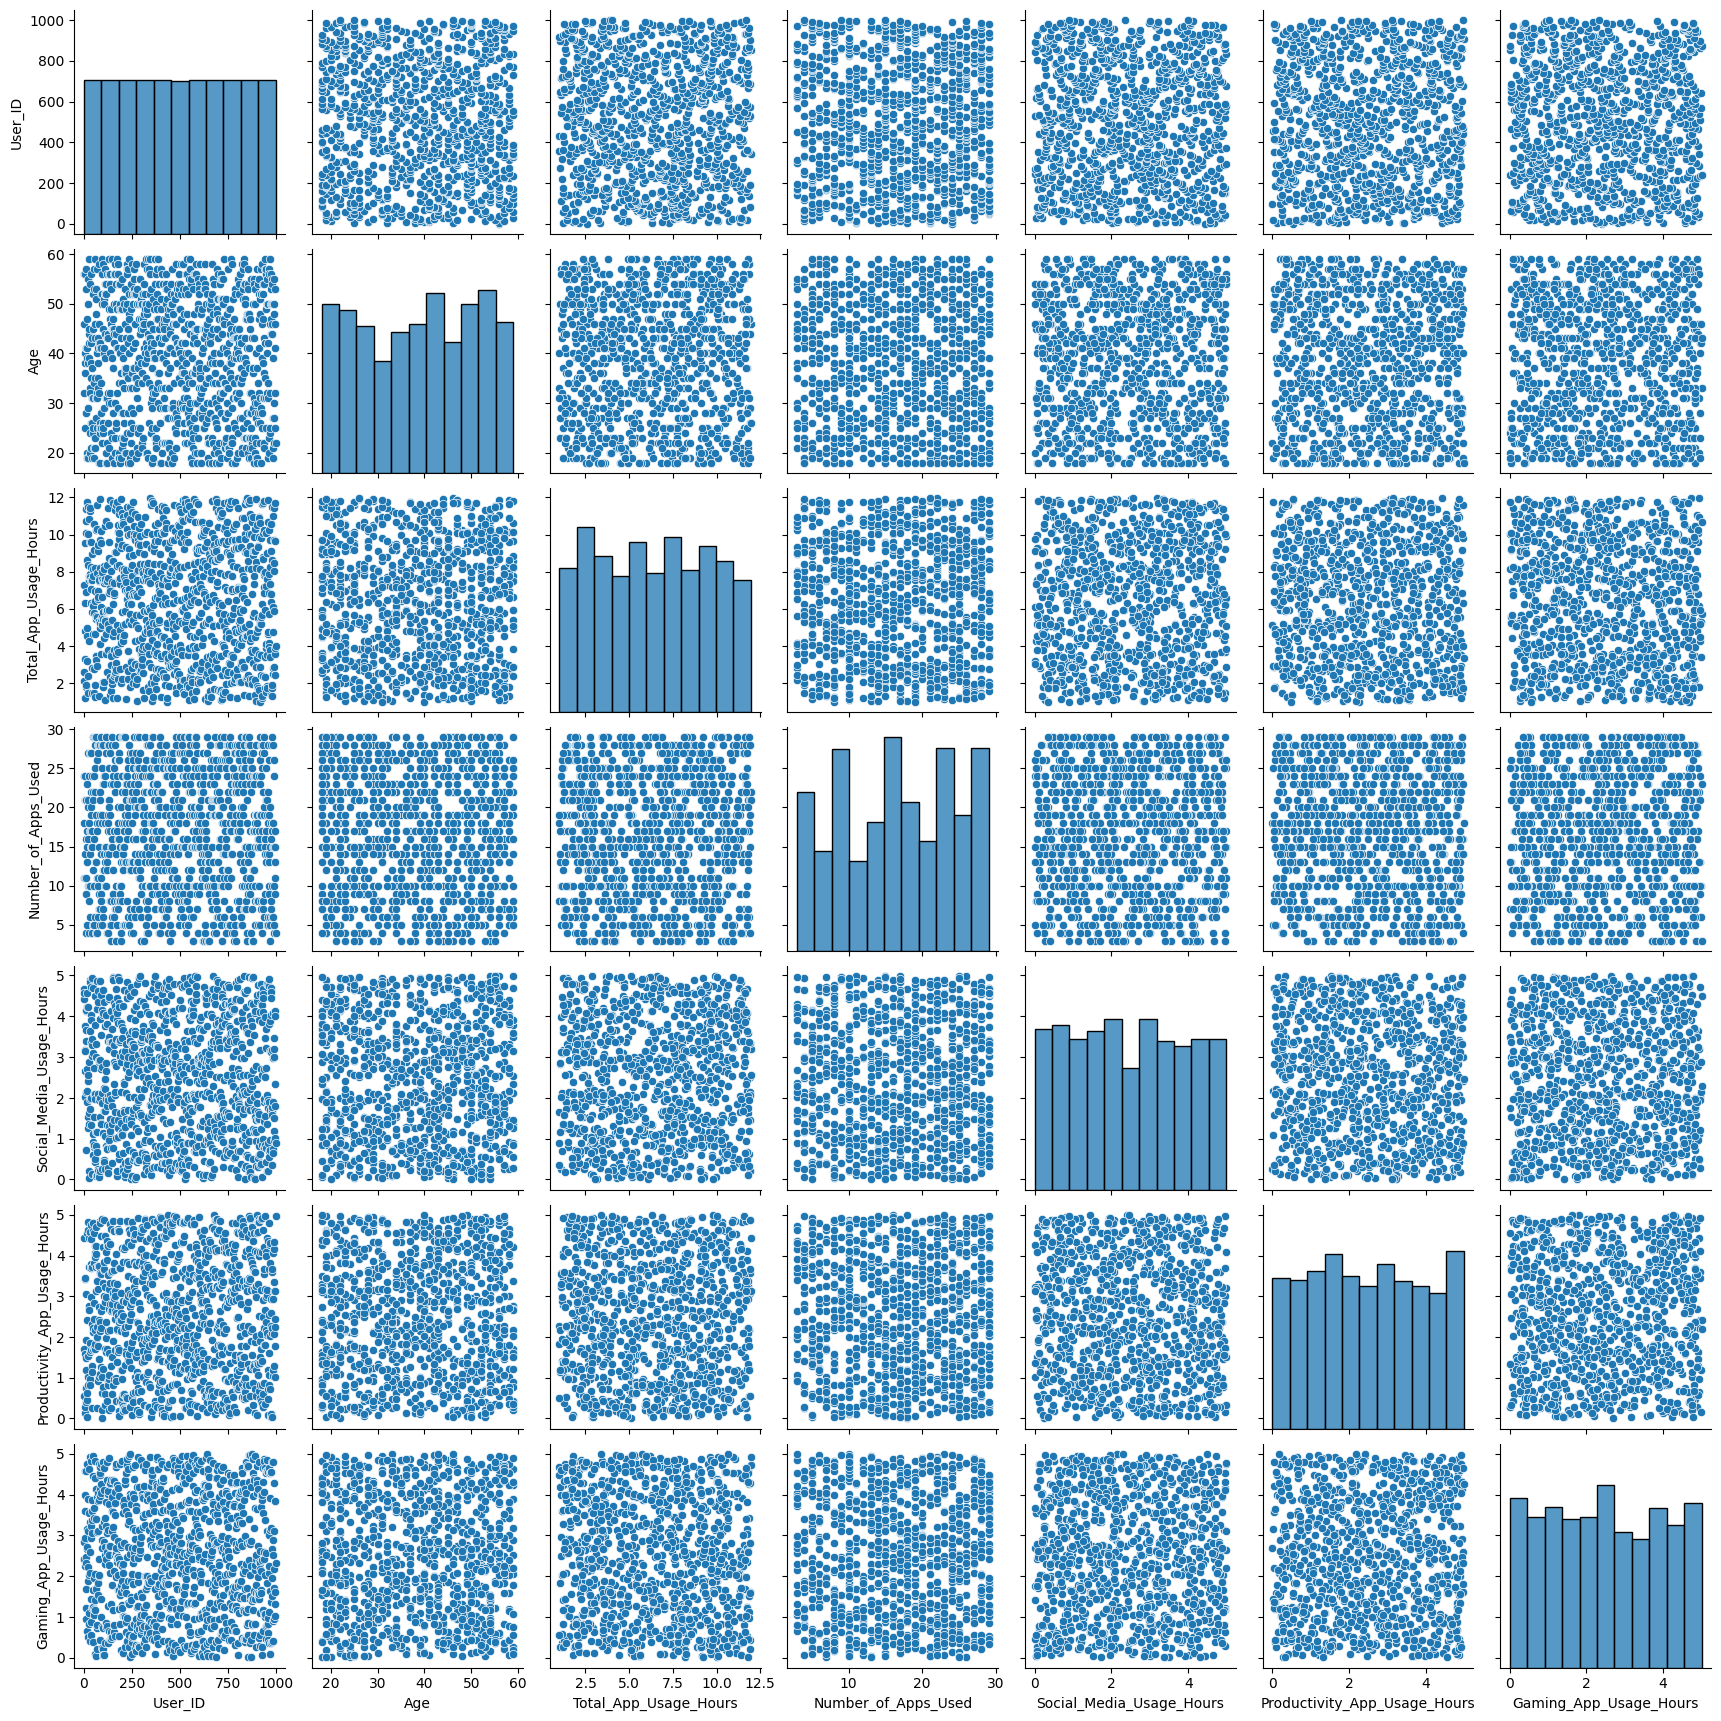

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# pairploty nic nie dają, to po prostu chaotyczne wypełnienie kropkami (są zbyt ogólne)
sns.pairplot(df.drop(columns=["User_ID", "Gender"]), kind="scatter", hue="Location")
plt.show()
sns.pairplot(df.drop(columns=["Gender", "Daily_Screen_Time_Hours"]), kind="scatter")
plt.show()


In [3]:

sns.heatmap(only_numbers.corr(),annot = only_numbers.corr())
plt.show()

NameError: name 'only_numbers' is not defined

In [ ]:
#Uczenie Maszynowe: 
#Regresja wieku użytkownika: LinearRegression, SVM, DecisionTreeRegressor.  

In [18]:
X = onlyNums.drop(columns=["Age"]) 
y = onlyNums["Age"]